# Sentiment Analysis
Sentiment Analysis, also known as opinion mining, is a Natural Language Processing (NLP) technique used to determine the emotional tone behind a piece of text. It helps analyze whether the sentiment expressed in the text is positive, negative, or neutral.

## Data Loading and Reading

In [1]:
#Basic libraries
import pandas as pd 
import numpy as np 


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 
import cufflinks as cf

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Newdata.csv")
df.head()

,id,profileName,text,date,title,rating,images,helpful,variant:,variant:colour,variant:style name
0,R1MI8HNTIFTDYT,Arnav,____________________Technical Specifications--...,Reviewed in India on 27 January 2018,The best earphones you can find out there unde...,4.0 out of 5 stars,https://images-na.ssl-images-amazon.com/images...,946,NaN,NaN,NaN
1,R3FUI70O5HA6WM,Raam,The product is budget friendly and the durabil...,Reviewed in India on 18 January 2025,Budget friendly product,4.0 out of 5 stars,https://m.media-amazon.com/images/I/81Zy89LV60...,0,NaN,NaN,NaN
2,RXUFVUS32AF5F,Gayatri Naik,"Nice product, Best for Bess Lover",Reviewed in India on 23 January 2025,Nice product,4.0 out of 5 stars,https://m.media-amazon.com/images/I/61FQEswSkY...,0,NaN,NaN,NaN
3,RP9I4VL12V12M,Vikas Khade,This is the second time I am using these earph...,Reviewed in India on 30 January 2025,Good quality of earphones,5.0 out of 5 stars,https://m.media-amazon.com/images/I/615a2VpHWF...,0,NaN,Black,With Carry Case
4,R387EBPRKIKDD0,Ashish Mishra,"I must say it survived 4 years, I have used my...",Reviewed in India on 20 October 2024,After 4 years,4.0 out of 5 stars,https://m.media-amazon.com/images/I/61wC+zWFi1...,0,NaN,NaN,NaN


## Data Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  623 non-null    object 
 1   profileName         623 non-null    object 
 2   text                623 non-null    object 
 3   date                623 non-null    object 
 4   title               623 non-null    object 
 5   rating              623 non-null    object 
 6   images              77 non-null     object 
 7   helpful             623 non-null    int64  
 8   variant:            0 non-null      float64
 9   variant:colour      185 non-null    object 
 10  variant:style name  185 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 53.7+ KB


In [6]:
df=df[['text','title','rating','date']]
df.shape

(623, 4)

## Handling Missing and Duplicate Data

In [7]:
# Checking for Null or Missing Values.
df.isnull().sum()

text      0
title     0
rating    0
date      0
dtype: int64

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(623, 4)

## Renaming Columns

In [10]:
df.columns

Index(['text', 'title', 'rating', 'date'], dtype='object')

In [11]:
df.rename(columns={
    'rating': 'Rating',
    'date': 'Review_Date',
    'text':'Review_Text',
    'title':'Review_Title'
}, inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Text   623 non-null    object
 1   Review_Title  623 non-null    object
 2   Rating        623 non-null    object
 3   Review_Date   623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [13]:
df["Rating"]=df["Rating"].str.extract(r'(\d+)').astype(int)

In [14]:
df["Review_Date"]=df["Review_Date"].str.extract(r'on (\d{1,2} \w+ \d{4})')[0]

In [15]:
df=df.dropna(subset=["Review_Date"]) 

In [16]:
df[["Day","Month","Year"]]=df["Review_Date"].str.split(" ",expand=True)

In [17]:
df.drop(columns=["Review_Date"],inplace=True)

In [18]:
df.head()

,Review_Text,Review_Title,Rating,Day,Month,Year
0,____________________Technical Specifications--...,The best earphones you can find out there unde...,4,27,January,2018
1,The product is budget friendly and the durabil...,Budget friendly product,4,18,January,2025
2,"Nice product, Best for Bess Lover",Nice product,4,23,January,2025
3,This is the second time I am using these earph...,Good quality of earphones,5,30,January,2025
4,"I must say it survived 4 years, I have used my...",After 4 years,4,20,October,2024


In [19]:
df['Rating'].value_counts()

Rating
2    144
3    136
4    123
5    110
1    110
Name: count, dtype: int64

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khale\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

## Stemming the reviews
**Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,**
* **Going->go**
* **Finally->fina**

In [22]:
def stemming(content):
  stemmed_text=re.sub('[^a-zA-Z]',' ',content)
  stemmed_text=stemmed_text.lower()

  stemmed_text=stemmed_text.split()
  stemmed_text_filtered=[]
  for i in stemmed_text:
    if i not in stopwords.words('english'):
      stemmed_text_filtered.append(ps.stem(i))
  stemmed_text=' '.join(stemmed_text_filtered)
  return stemmed_text

In [23]:
df['Stemmed_Text']=df['Review_Text'].apply(stemming)

In [24]:
df.head()

,Review_Text,Review_Title,Rating,Day,Month,Year,Stemmed_Text
0,____________________Technical Specifications--...,The best earphones you can find out there unde...,4,27,January,2018,technic specif technic inform boat basshead ea...
1,The product is budget friendly and the durabil...,Budget friendly product,4,18,January,2025,product budget friendli durabl year worth buy ...
2,"Nice product, Best for Bess Lover",Nice product,4,23,January,2025,nice product best bess lover
3,This is the second time I am using these earph...,Good quality of earphones,5,30,January,2025,second time use earphon good sound qualiti ear...
4,"I must say it survived 4 years, I have used my...",After 4 years,4,20,October,2024,must say surviv year use earphon lot fell mani...


In [25]:
def stem(title):
  stemmed_title=re.sub('[^a-zA-Z]',' ',title)
  stemmed_title=stemmed_title.lower()
  stemmed_title=stemmed_title.split()
  stemmed_title_filtred=[]
  for i in stemmed_title:
    if i not in stopwords.words('english'):
      stemmed_title_filtred.append(ps.stem(i))
  stemmed_title=' '.join(stemmed_title_filtred)
  return stemmed_title

In [26]:
df["Stemmed_Title"]=df['Review_Title'].apply(stem)

## Visualizations

In [27]:
df.head()

,Review_Text,Review_Title,Rating,Day,Month,Year,Stemmed_Text,Stemmed_Title
0,____________________Technical Specifications--...,The best earphones you can find out there unde...,4,27,January,2018,technic specif technic inform boat basshead ea...,best earphon find buck comfort let find
1,The product is budget friendly and the durabil...,Budget friendly product,4,18,January,2025,product budget friendli durabl year worth buy ...,budget friendli product
2,"Nice product, Best for Bess Lover",Nice product,4,23,January,2025,nice product best bess lover,nice product
3,This is the second time I am using these earph...,Good quality of earphones,5,30,January,2025,second time use earphon good sound qualiti ear...,good qualiti earphon
4,"I must say it survived 4 years, I have used my...",After 4 years,4,20,October,2024,must say surviv year use earphon lot fell mani...,year


In [28]:
df['Content']=df['Stemmed_Title']+df['Stemmed_Text']
df.head()

,Review_Text,Review_Title,Rating,Day,Month,Year,Stemmed_Text,Stemmed_Title,Content
0,____________________Technical Specifications--...,The best earphones you can find out there unde...,4,27,January,2018,technic specif technic inform boat basshead ea...,best earphon find buck comfort let find,best earphon find buck comfort let findtechnic...
1,The product is budget friendly and the durabil...,Budget friendly product,4,18,January,2025,product budget friendli durabl year worth buy ...,budget friendli product,budget friendli productproduct budget friendli...
2,"Nice product, Best for Bess Lover",Nice product,4,23,January,2025,nice product best bess lover,nice product,nice productnice product best bess lover
3,This is the second time I am using these earph...,Good quality of earphones,5,30,January,2025,second time use earphon good sound qualiti ear...,good qualiti earphon,good qualiti earphonsecond time use earphon go...
4,"I must say it survived 4 years, I have used my...",After 4 years,4,20,October,2024,must say surviv year use earphon lot fell mani...,year,yearmust say surviv year use earphon lot fell ...


In [29]:
def sentiment(rate):
  if rate>3:
    return 'Positive'
  elif rate<3:
    return 'Negative'
  else:
    return 'Neutral'

df['Sentiments']=df["Rating"].apply(sentiment)

In [30]:
df.head()

,Review_Text,Review_Title,Rating,Day,Month,Year,Stemmed_Text,Stemmed_Title,Content,Sentiments
0,____________________Technical Specifications--...,The best earphones you can find out there unde...,4,27,January,2018,technic specif technic inform boat basshead ea...,best earphon find buck comfort let find,best earphon find buck comfort let findtechnic...,Positive
1,The product is budget friendly and the durabil...,Budget friendly product,4,18,January,2025,product budget friendli durabl year worth buy ...,budget friendli product,budget friendli productproduct budget friendli...,Positive
2,"Nice product, Best for Bess Lover",Nice product,4,23,January,2025,nice product best bess lover,nice product,nice productnice product best bess lover,Positive
3,This is the second time I am using these earph...,Good quality of earphones,5,30,January,2025,second time use earphon good sound qualiti ear...,good qualiti earphon,good qualiti earphonsecond time use earphon go...,Positive
4,"I must say it survived 4 years, I have used my...",After 4 years,4,20,October,2024,must say surviv year use earphon lot fell mani...,year,yearmust say surviv year use earphon lot fell ...,Positive


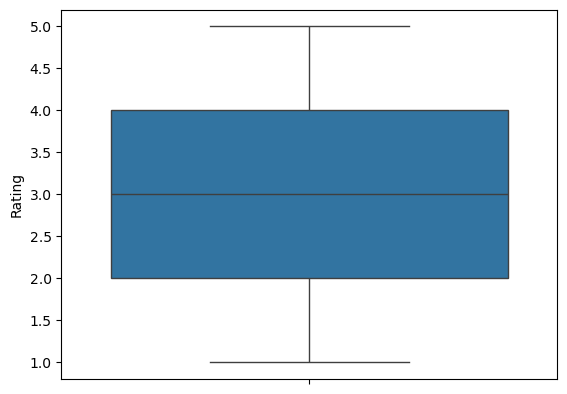

In [31]:
sns.boxplot(df['Rating'])
plt.show()

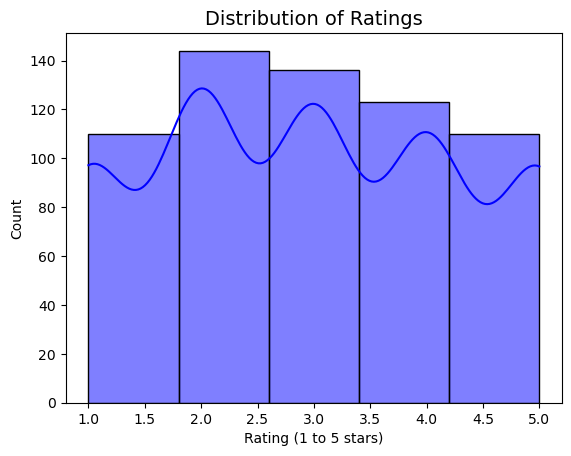

In [32]:
sns.histplot(df['Rating'],bins=5,kde=True,color='blue')
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Rating (1 to 5 stars)")
plt.ylabel("Count")
plt.show()

# Most Common Words in Reviews

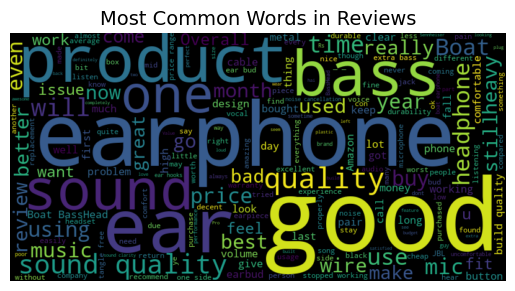

In [33]:
text=" ".join(df['Review_Text'].dropna())
wordcloud=WordCloud(width=800,height=400,background_color="black").generate(text)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews",fontsize=14)
plt.show()


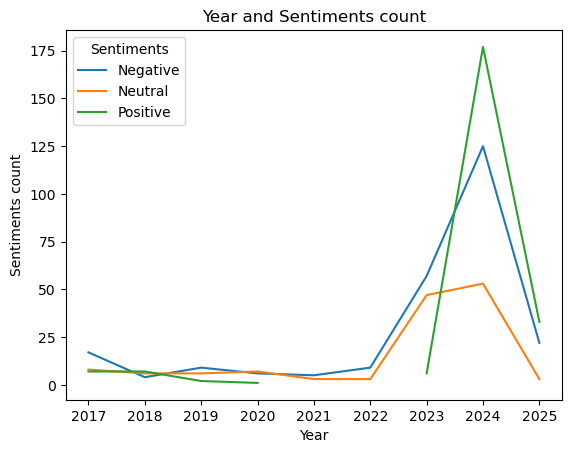

In [34]:
df.groupby(['Year','Sentiments'])['Sentiments'].count().unstack().plot(legend=True)
plt.title('Year and Sentiments count')
plt.xlabel('Year')
plt.ylabel('Sentiments count')
plt.show()

# Feature Extraction

In [35]:
df["Sentiments"]=LabelEncoder().fit_transform(df["Sentiments"])
df["Sentiments"].value_counts()

Sentiments
0    254
2    233
1    136
Name: count, dtype: int64

In [36]:
x=df["Content"]
y=df['Sentiments']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=1)

In [38]:
print(x)
print(y)

0      best earphon find buck comfort let findtechnic...
1      budget friendli productproduct budget friendli...
2               nice productnice product best bess lover
3      good qualiti earphonsecond time use earphon go...
4      yearmust say surviv year use earphon lot fell ...
                             ...                        
618    realli great util earphonuse earbud sinc soni ...
619    sound qualitiwant enjoy real dolbi sound look ...
620    superb qualiti earphon boatrecent bought boat ...
621    look good sturdicame along spare ear hook ear ...
622          durabluse earphon past year still work fine
Name: Content, Length: 623, dtype: object
0      2
1      2
2      2
3      2
4      2
      ..
618    2
619    2
620    2
621    2
622    2
Name: Sentiments, Length: 623, dtype: int32


## TFIDF(Term Frequency — Inverse Document Frequency)
**TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.**

In [39]:
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

# Model Building

In [40]:
print(x_train)
print(x_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10370 stored elements and shape (436, 2475)>
  Coords	Values
  (0, 1450)	0.39417264381710887
  (0, 319)	0.684337352970727
  (0, 317)	0.4180822388608934
  (0, 2438)	0.4489070680489585
  (1, 915)	0.5042802923195924
  (1, 1668)	0.17590812324636498
  (1, 1497)	0.2120372709907751
  (1, 1974)	0.26579715838528734
  (1, 623)	0.18645133693056923
  (1, 2419)	0.20112936004548845
  (1, 1708)	0.28293588072613557
  (1, 2234)	0.34009420778297866
  (1, 1374)	0.295908726621645
  (1, 2363)	0.3353074806338652
  (1, 2039)	0.16130724407177702
  (1, 1738)	0.15682268650940465
  (1, 66)	0.2282071858805977
  (1, 894)	0.1597839141851113
  (2, 1974)	0.36813979552207693
  (2, 2419)	0.27857228395685835
  (2, 422)	0.6984485644170979
  (2, 2051)	0.5468456605183202
  (3, 2039)	0.1091701451517866
  (3, 853)	0.28258256358810907
  (3, 547)	0.23361900879064523
  :	:
  (434, 506)	0.1169076894361993
  (434, 1630)	0.1169076894361993
  (434, 289)	0.116907689436199

## Logistic Regression

In [41]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [42]:
from sklearn.metrics import accuracy_score
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [43]:
print('Logistic Regression Accuracy :',training_data_accuracy)

Logistic Regression Accuracy : 0.9311926605504587


In [44]:
import pickle
with open("model.pkl","wb") as model_file:
    pickle.dump(model,model_file)
with open("vectorizer.pkl","wb") as vectorizer_file:
    pickle.dump(vectorizer,vectorizer_file)

In [45]:
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': BernoulliNB()
}


In [46]:
for name, model in models.items():
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    print(f"{name} Accuracy: {accuracy:.4f}")

# Hyperparameter tuning for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(), param_grid, cv=5)
svm_model.fit(x_train, y_train)

# Best SVM Model Results
print("\nBest SVM Model:", svm_model.best_estimator_)
print("SVM Test Accuracy:", svm_model.score(x_test, y_test))

# Evaluate the best model
y_pred = svm_model.predict(x_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

RandomForest Accuracy: 0.6203
SVM Accuracy: 0.6631
KNN Accuracy: 0.5561
Naive Bayes Accuracy: 0.4332

Best SVM Model: SVC(C=1, kernel='linear')
SVM Test Accuracy: 0.6524064171122995

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69        76
           1       0.42      0.24      0.31        41
           2       0.71      0.83      0.76        70

    accuracy                           0.65       187
   macro avg       0.60      0.59      0.59       187
weighted avg       0.63      0.65      0.63       187

